BDDA PROJECT

MADE BY - GROUP 7

Swapnil Malik-015016

Sumit Gupta- 015022

Muskan Jain- 015034

Pragya Jain- 015038

Sarthak Kumar- 015042

In [53]:
# import numpy as np 
import pandas as pd 

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D, BatchNormalization
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

import os
print(os.listdir("C:\\Users\\Sumit\\Desktop\\Sumit Gupta\\MBA Study Material\\Term-4\\DNLP\\Project"))
print("Tensorflow version: ", tf.__version__)

['sampleSubmission.csv', 'test1.zip', 'train.zip', 'Working']
Tensorflow version:  2.4.1


Prepare Traning Data

In [2]:
filenames = os.listdir("C:\\Users\\Sumit\\Desktop\\Sumit Gupta\\MBA Study Material\\Term-4\\DNLP\\Project\\Working\\train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [3]:
df.tail()

,filename,category
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


Total Count

In [4]:
df.category.value_counts()

1    12500
0    12500
Name: category, dtype: int64

Sample Image

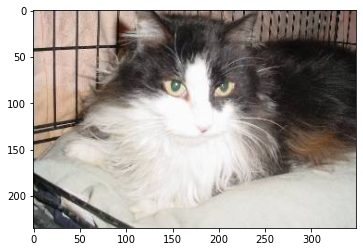

In [5]:
sample = random.choice(filenames)
image = load_img("C:\\Users\\Sumit\\Desktop\\Sumit Gupta\\MBA Study Material\\Term-4\\DNLP\\Project\\Working\\train\\"+sample)
plt.imshow(image)

Build Model

Input Layer: It represent input image data. It will reshape image into single diminsion array.

Conv Layer: This layer will extract features from image.

Pooling Layer: This layerreduce the spatial volume of input image after convolution.

Fully Connected Layer: It connect the network from a layer to another layer

Output Layer: It is the predicted values layer.

In [7]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3,activation="relu", input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=3,activation="relu"))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dense(units=2, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)      

Prepare data

Because we will use image genaretor with class_mode="categorical". We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification.

So we will convert 1 to dog and 0 to cat

In [8]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [9]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

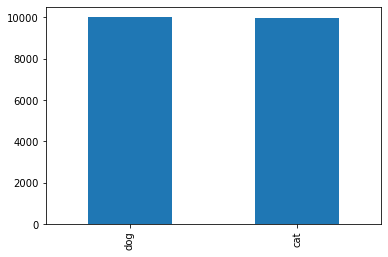

In [10]:
train_df['category'].value_counts().plot.bar()

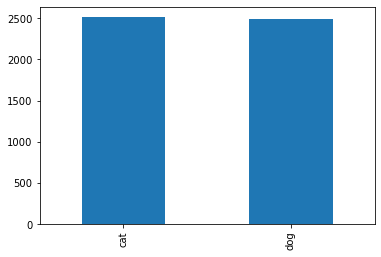

In [11]:
validate_df['category'].value_counts().plot.bar()

In [12]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

Traning Generator

In [13]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Flow training images in batches of 20 using train_datagen generator

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "C:\\Users\\Sumit\\Desktop\\Sumit Gupta\\MBA Study Material\\Term-4\\DNLP\\Project\\Working\\train", 
    x_col='filename',
    y_col='category',
    target_size= (150, 150),
    class_mode='categorical',
    batch_size= 20
)

Found 20000 validated image filenames belonging to 2 classes.


Validation Generator

In [14]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "C:\\Users\\Sumit\\Desktop\\Sumit Gupta\\MBA Study Material\\Term-4\\DNLP\\Project\\Working\\train", 
    x_col='filename',
    y_col='category',
    target_size= (150, 150),
    class_mode='categorical',
    batch_size= 20
)

Found 5000 validated image filenames belonging to 2 classes.


See How our Generator work

In [16]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "C:\\Users\\Sumit\\Desktop\\Sumit Gupta\\MBA Study Material\\Term-4\\DNLP\\Project\\Working\\train", 
    x_col='filename',
    y_col='category',
    target_size= (150, 150),
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


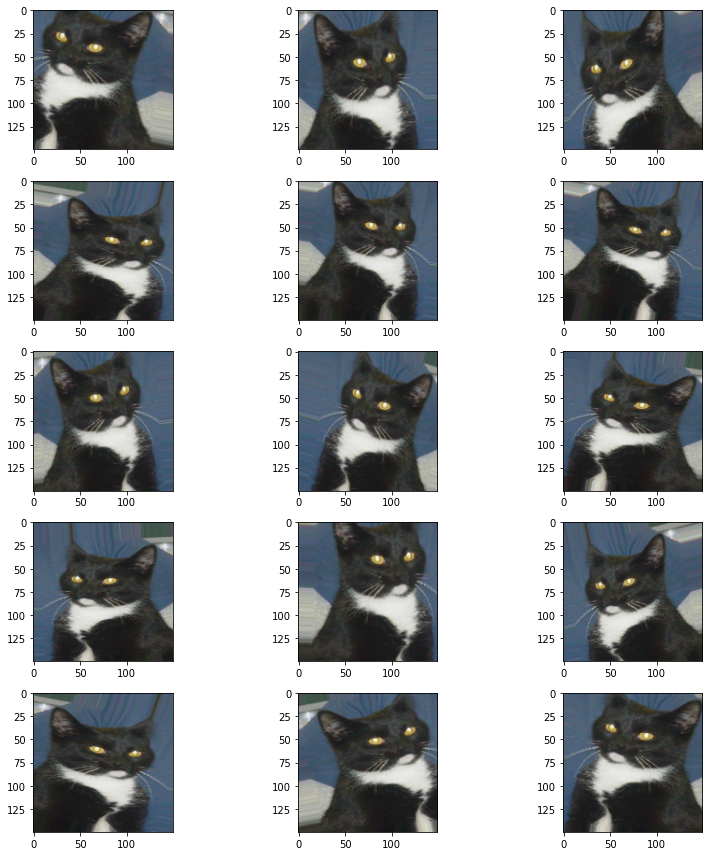

In [17]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [18]:
from keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor="val_loss", patience=4)
history=model.fit(train_generator, validation_data=validation_generator, epochs=10,callbacks=[callback])

Epoch 1/10
1000/1000 [==============================] - 802s 799ms/step - loss: 0.8141 - accuracy: 0.5278 - val_loss: 0.6204 - val_accuracy: 0.6604
Epoch 2/10
1000/1000 [==============================] - 806s 805ms/step - loss: 0.6113 - accuracy: 0.6675 - val_loss: 0.5112 - val_accuracy: 0.7418
Epoch 3/10
1000/1000 [==============================] - 803s 802ms/step - loss: 0.5348 - accuracy: 0.7334 - val_loss: 0.4532 - val_accuracy: 0.7838
Epoch 4/10
1000/1000 [==============================] - 847s 847ms/step - loss: 0.4745 - accuracy: 0.7815 - val_loss: 0.4131 - val_accuracy: 0.8086
Epoch 5/10
1000/1000 [==============================] - 824s 824ms/step - loss: 0.4586 - accuracy: 0.7783 - val_loss: 0.3969 - val_accuracy: 0.8192
Epoch 6/10
1000/1000 [==============================] - 814s 814ms/step - loss: 0.4417 - accuracy: 0.7953 - val_loss: 0.3867 - val_accuracy: 0.8222
Epoch 7/10
1000/1000 [==============================] - 787s 787ms/step - loss: 0.4210 - accuracy: 0.8068 - val_

Fit Model

In [ ]:
#epochs=3 if FAST_RUN else 50
#history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

In [ ]:
model.save_weights("model.h5")

Performance Evaluation of the Training

In [20]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.699148,0.56125,0.620396,0.6604
1,0.586581,0.69030,0.511180,0.7418
2,0.520885,0.74100,0.453223,0.7838
3,0.476907,0.77475,0.413147,0.8086
4,0.457570,0.78060,0.396925,0.8192
5,0.435623,0.79930,0.386681,0.8222
6,0.422072,0.80580,0.373441,0.8352
7,0.411060,0.81100,0.345022,0.8454
8,0.391016,0.82165,0.354715,0.8438
9,0.384282,0.82605,0.312704,0.8632


In [22]:
import seaborn as sns

Virtualize Training

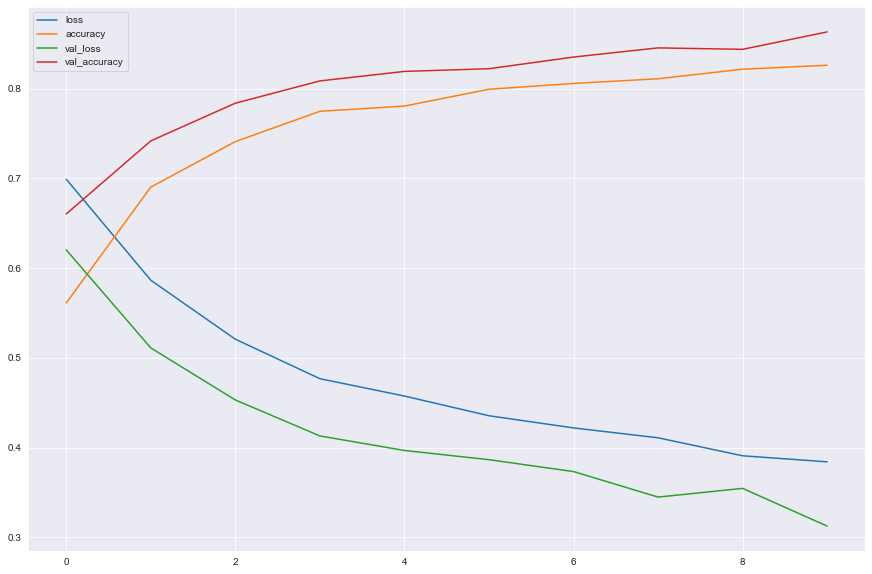

In [23]:
sns.set_style("darkgrid")
pd.DataFrame(model.history.history).plot(figsize=(15,10))

Prepare Testing Data

In [41]:
test_filenames = os.listdir("C:\\Users\\Sumit\\Desktop\\Sumit Gupta\\MBA Study Material\\Term-4\\DNLP\\Project\\Working\\test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]
test_df.head()

,filename
0,1.jpg
1,10.jpg
2,100.jpg
3,1000.jpg
4,10000.jpg


In [37]:
test_dir = "C:\\Users\\Sumit\\Desktop\\Sumit Gupta\\MBA Study Material\\Term-4\\DNLP\\Project\\Working\\test1"
test_images = os.listdir(os.path.join(test_dir))
test_images[:10]

test_df = pd.DataFrame({'Image': test_images})
test_df.head()

,Image
0,1.jpg
1,10.jpg
2,100.jpg
3,1000.jpg
4,10000.jpg


Create Testing Generator

In [42]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "C:\\Users\\Sumit\\Desktop\\Sumit Gupta\\MBA Study Material\\Term-4\\DNLP\\Project\\Working\\test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size= (150,150),
    batch_size= 20,
    shuffle=False
)

Found 12500 validated image filenames.


Predict

In [43]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

C:\Users\Sumit\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


For categorical classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [44]:
test_df['category'] = np.argmax(predict, axis=-1)

We will convert the predict category back into our generator classes by using train_generator.class_indices. It is the classes that image generator map while converting data into computer vision

In [45]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

From our prepare data part. We map data with {1: 'dog', 0: 'cat'}. Now we will map the result back to dog is 1 and cat is 0

In [46]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

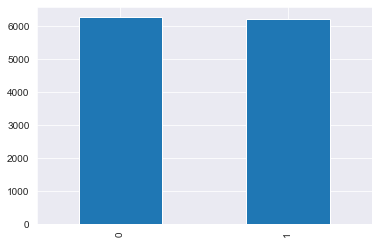

In [47]:
test_df['category'].value_counts().plot.bar()

See predicted result with images

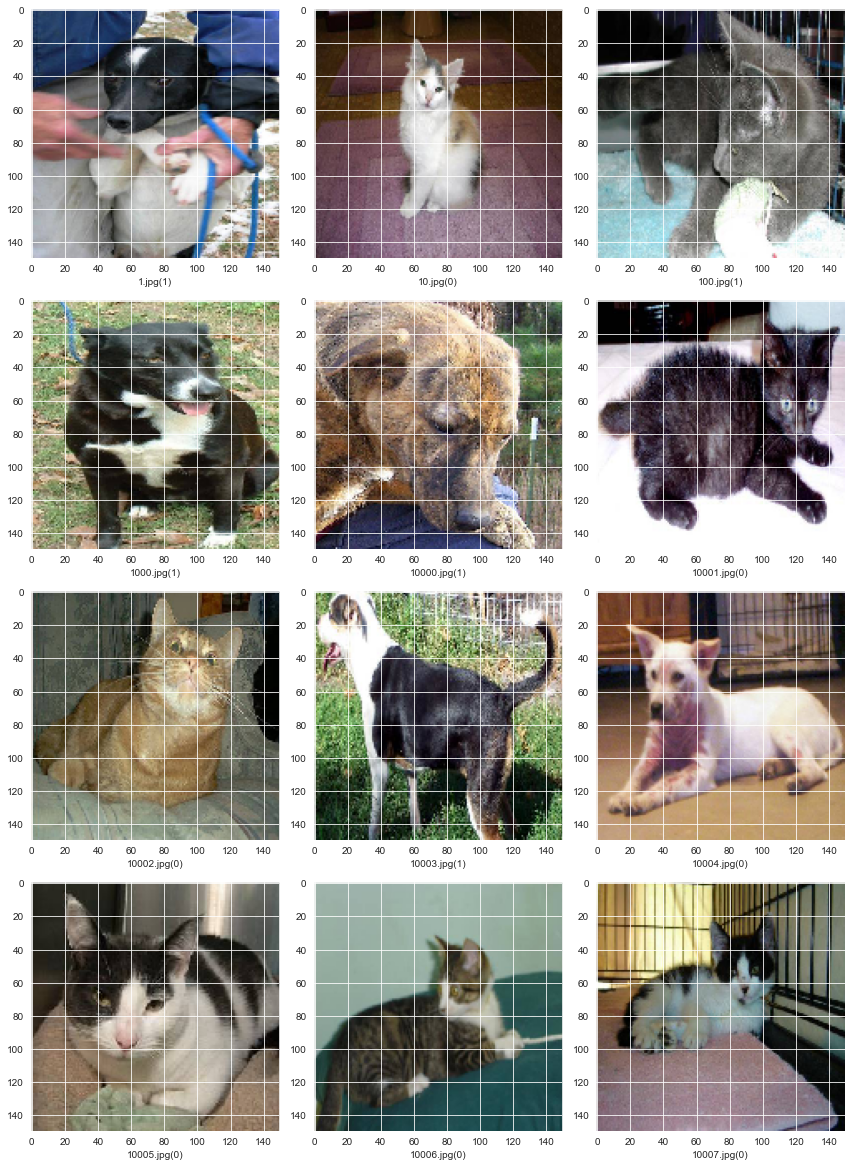

In [50]:
sample_test = test_df.head(12)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("C:\\Users\\Sumit\\Desktop\\Sumit Gupta\\MBA Study Material\\Term-4\\DNLP\\Project\\Working\\test1\\"+filename, target_size=(150, 150))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

Submission

In [51]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)

In [52]:
submission_df

,id,label
0,1,1
1,10,0
2,100,1
3,1000,1
4,10000,1
...,...,...
12495,9995,0
12496,9996,1
12497,9997,1
12498,9998,0
